In [52]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [53]:
with open('log/info.log',  encoding="utf-8") as  f:
    lines = f.readlines()

Получение всего времени работы программы

In [54]:
r = re.compile(".*Выход из приложения OCI. Время работы.*")
newlist = list(filter(r.match, lines))
whole_minutes_count = 0
for t_list in newlist:
    minutes_count = float(re.findall(r'\d+\.\d+', t_list)[0])
    whole_minutes_count += minutes_count
whole_minutes_count

74.97

Получение времени раскроя

Среднее время рассчетов раскроя для заказа: 0.689925
Максимальное время рассчетов раскроя для заказа: 0.7568


(array([1., 0., 0., 1., 0., 1., 2., 3., 2., 2.]),
 array([0.5488, 0.5696, 0.5904, 0.6112, 0.632 , 0.6528, 0.6736, 0.6944,
        0.7152, 0.736 , 0.7568]),
 <BarContainer object of 10 artists>)

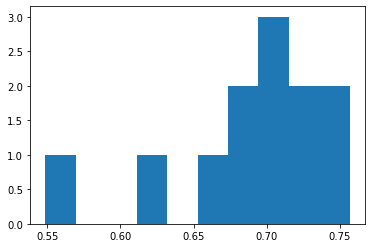

In [44]:
r = re.compile(".*Время выполнения функции stmh_idrd: *")
newlist = list(filter(r.match, lines))
all_calcul_time = []
for t_list in newlist:
    minutes_count = float(re.findall(r'\d+\.\d+', t_list)[0])
    all_calcul_time.append(minutes_count)
all_calcul_time = np.array(all_calcul_time)
print("Среднее время рассчетов раскроя для заказа:", np.mean(all_calcul_time))
print("Максимальное время рассчетов раскроя для заказа:", np.max(all_calcul_time))
plt.hist(all_calcul_time)

Количество добавлений заказа в базу

In [47]:
r = re.compile(".*добавлен в базу*")
newlist = list(filter(r.match, lines))
print(len(newlist))

2


Количество раз, когда был успешно сформирован заказ

In [48]:
r = re.compile(".*успешно создан*")
newlist = list(filter(r.match, lines))
print(len(newlist))

12


Количество раз, когда был произведен расчет размер слитка

In [51]:
r = re.compile(".*Расчет слитка *")
newlist = list(filter(r.match, lines))
print(len(newlist))

1


In [45]:
lines

['[INFO:24/06/2021 15:38:44:mainwindow.py(1136)] Приложение OCI запущено.\n',
 '[INFO:24/06/2021 15:39:18:dialogs.py(538)] Попытка расчета слитка под ПЗ ЗАКАЗ: 8 заготовок, 4 толщин\n',
 '[INFO:24/06/2021 15:39:20:dialogs.py(548)] Расчет слитка ЗАКАЗ успешно завершен. Размеры: 81, 180, 30; эффективность: 0 толщин\n',
 '[INFO:24/06/2021 15:39:30:dialogs.py(789)] Заказ 1 добавлен в базу.\n',
 '[INFO:24/06/2021 15:43:00:mainwindow.py(424)] Попытка создания раскроя для заказа 1.\n',
 '[INFO:24/06/2021 15:43:00:mainwindow.py(430)] Заказ 1: 8 заготовок, 4 толщин, слиток 81х180х30\n',
 '[INFO:24/06/2021 15:43:01:log.py(57)] Время выполнения функции stmh_idrd: 0.6283 сек\n',
 '[INFO:24/06/2021 15:43:01:mainwindow.py(454)] Раскрой для заказа 1 успешно создан.\n',
 '[INFO:24/06/2021 15:43:40:mainwindow.py(424)] Попытка создания раскроя для заказа 1.\n',
 '[INFO:24/06/2021 15:43:40:mainwindow.py(430)] Заказ 1: 10 заготовок, 4 толщин, слиток 81х180х30\n',
 '[INFO:24/06/2021 15:43:41:log.py(57)] Вр